In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# 1 EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
for col in train.columns:
    msg = 'column: {:>12}\t Perecent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum()/train.shape[0]))
    print(msg)

column:  PassengerId	 Perecent of NaN value: 0.00%
column:     Survived	 Perecent of NaN value: 0.00%
column:       Pclass	 Perecent of NaN value: 0.00%
column:         Name	 Perecent of NaN value: 0.00%
column:          Sex	 Perecent of NaN value: 0.00%
column:          Age	 Perecent of NaN value: 19.87%
column:        SibSp	 Perecent of NaN value: 0.00%
column:        Parch	 Perecent of NaN value: 0.00%
column:       Ticket	 Perecent of NaN value: 0.00%
column:         Fare	 Perecent of NaN value: 0.00%
column:        Cabin	 Perecent of NaN value: 77.10%
column:     Embarked	 Perecent of NaN value: 0.22%


In [6]:
for col in test.columns:
    msg = 'column: {:>12}\t Perecent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum()/test.shape[0]))
    print(msg)

column:  PassengerId	 Perecent of NaN value: 0.00%
column:       Pclass	 Perecent of NaN value: 0.00%
column:         Name	 Perecent of NaN value: 0.00%
column:          Sex	 Perecent of NaN value: 0.00%
column:          Age	 Perecent of NaN value: 20.57%
column:        SibSp	 Perecent of NaN value: 0.00%
column:        Parch	 Perecent of NaN value: 0.00%
column:       Ticket	 Perecent of NaN value: 0.00%
column:         Fare	 Perecent of NaN value: 0.24%
column:        Cabin	 Perecent of NaN value: 78.23%
column:     Embarked	 Perecent of NaN value: 0.00%


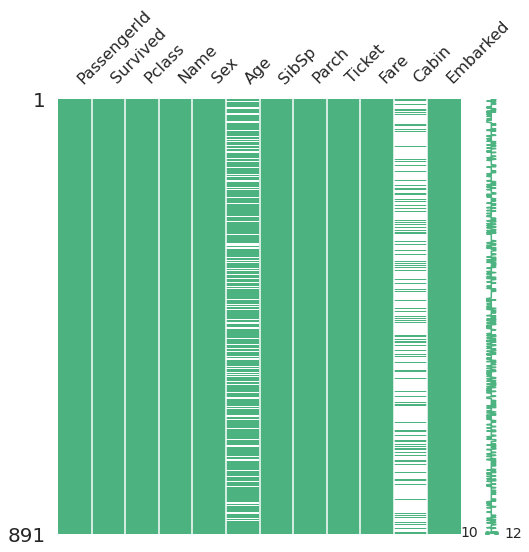

In [7]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.3, 0.7, 0.5))
plt.show()

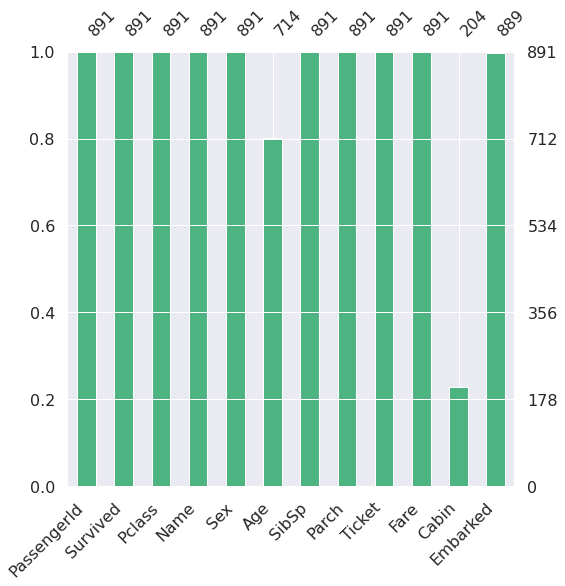

In [8]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.3, 0.7, 0.5))
plt.show()

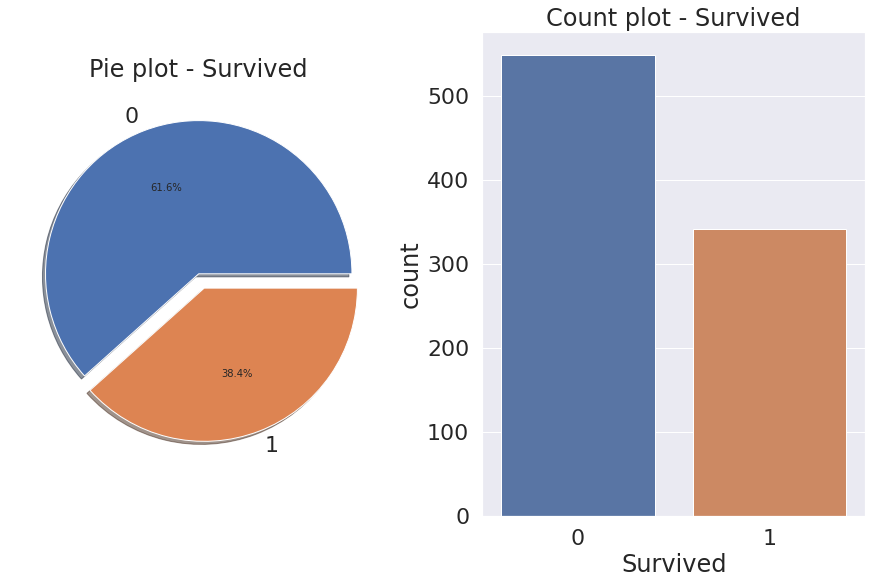

In [9]:
f, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

## 1.1 Pclass

In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


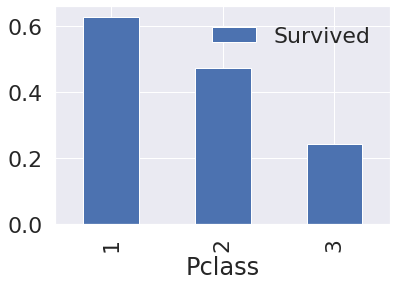

In [12]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().\
sort_values(by='Survived', ascending=False).plot.bar()
plt.show()

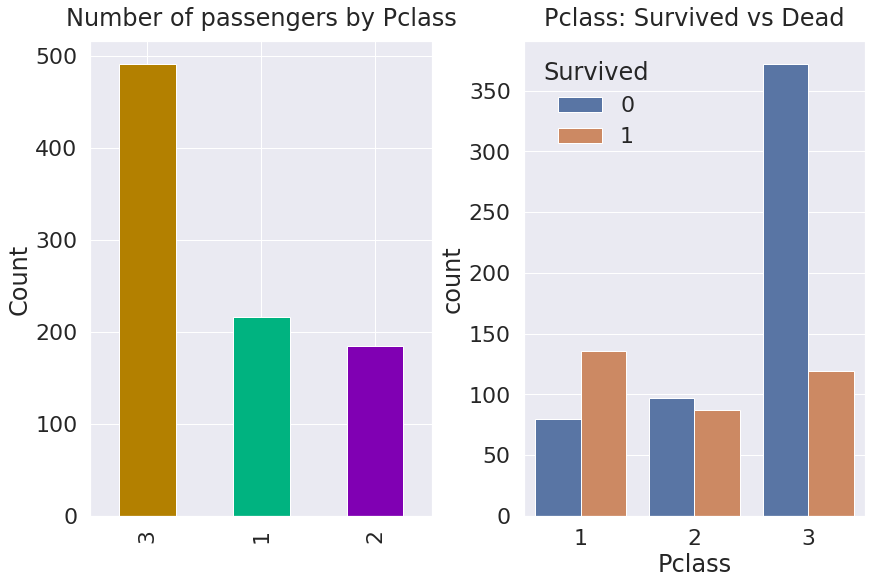

In [13]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)
train['Pclass'].value_counts().plot.bar(color=[(0.7,0.5,0), (0,0.7,0.5), (0.5,0,0.7)], ax=ax[0])
ax[0].set_title('Number of passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', data=train, hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

High class survived more.

## 1.2 Sex

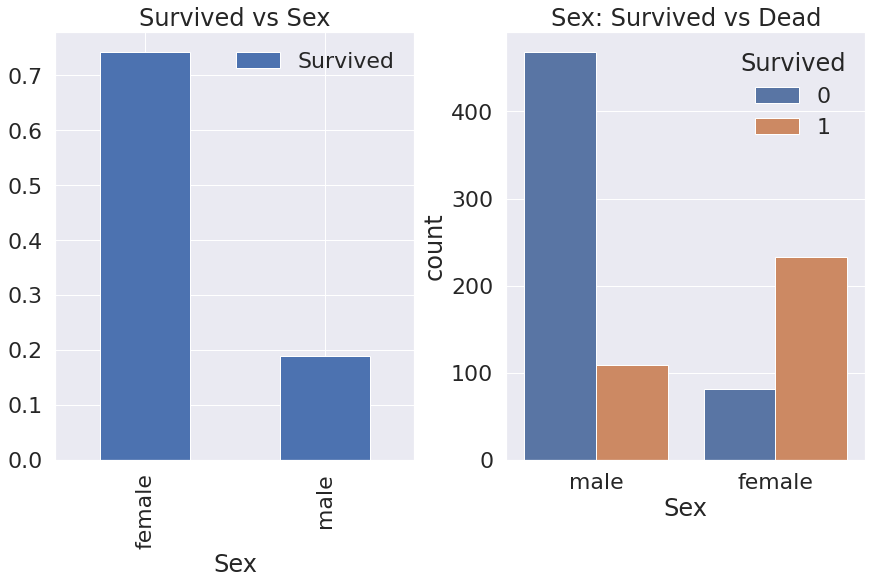

In [14]:
f, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)
train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [15]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Both Sex and Pclass

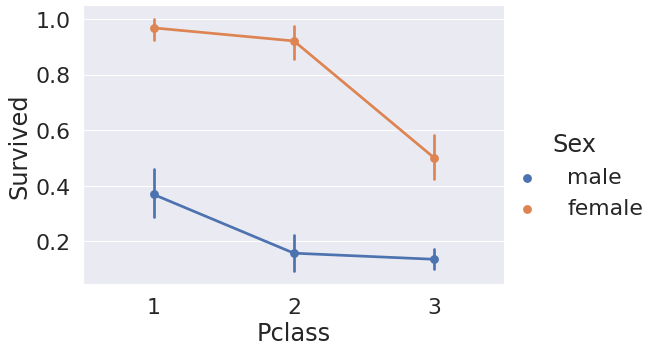

In [16]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, aspect=1.5)
plt.show()

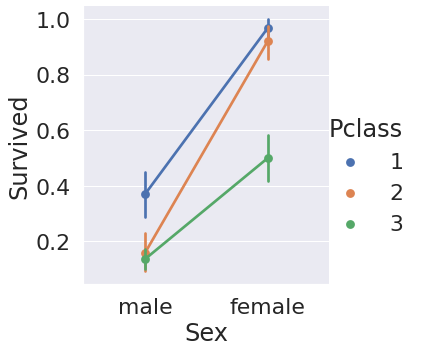

In [17]:
sns.factorplot('Sex', 'Survived', hue='Pclass', data=train, aspect=1)
plt.show()

Women first.

## 1.3 Age

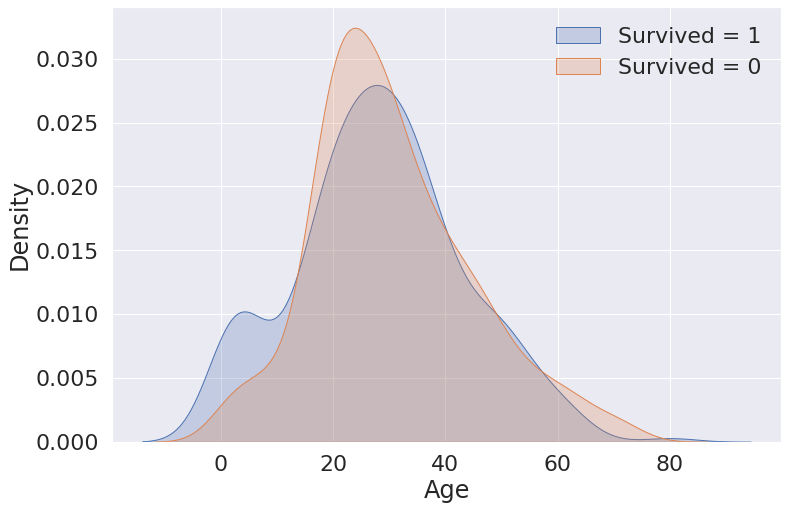

In [18]:
f = plt.figure(figsize=(12, 8))
sns.kdeplot(train[train['Survived'] == 1]['Age'], shade=True)
sns.kdeplot(train[train['Survived'] == 0]['Age'], shade=True)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

Both Age and Pclass

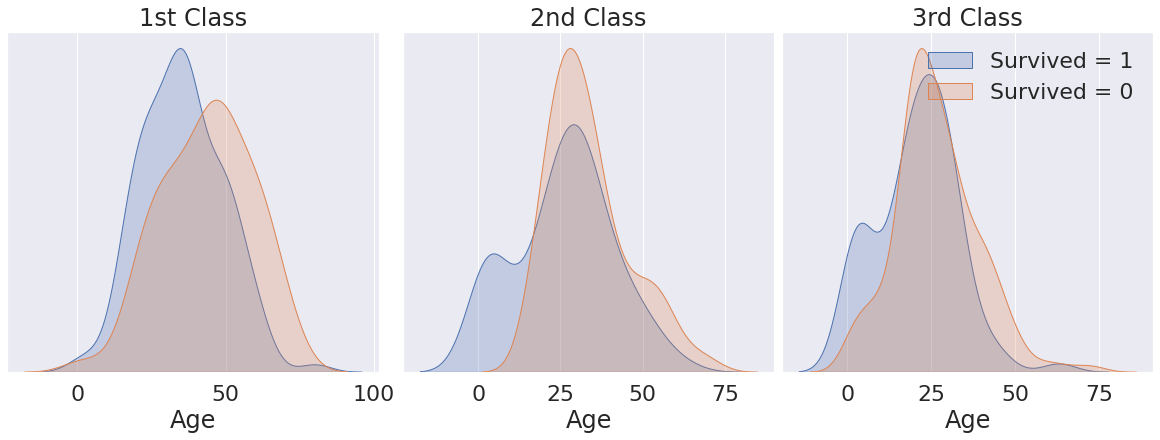

In [19]:
f, ax = plt.subplots(1, 3, figsize=(16, 6), constrained_layout=True)
sns.kdeplot(train[(train['Survived'] == 1) & (train['Pclass'] == 1)]['Age'], shade=True, ax=ax[0])
sns.kdeplot(train[(train['Survived'] == 0) & (train['Pclass'] == 1)]['Age'], shade=True, ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('1st Class')
ax[0].set_yticks([])
sns.kdeplot(train[(train['Survived'] == 1) & (train['Pclass'] == 2)]['Age'], shade=True, ax=ax[1])
sns.kdeplot(train[(train['Survived'] == 0) & (train['Pclass'] == 2)]['Age'], shade=True, ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('2nd Class')
ax[1].set_yticks([])
sns.kdeplot(train[(train['Survived'] == 1) & (train['Pclass'] == 3)]['Age'], shade=True, ax=ax[2])
sns.kdeplot(train[(train['Survived'] == 0) & (train['Pclass'] == 3)]['Age'], shade=True, ax=ax[2])
plt.legend(['Survived = 1', 'Survived = 0'])
ax[2].set_ylabel('')
ax[2].set_title('3rd Class')
ax[2].set_yticks([])
plt.show()

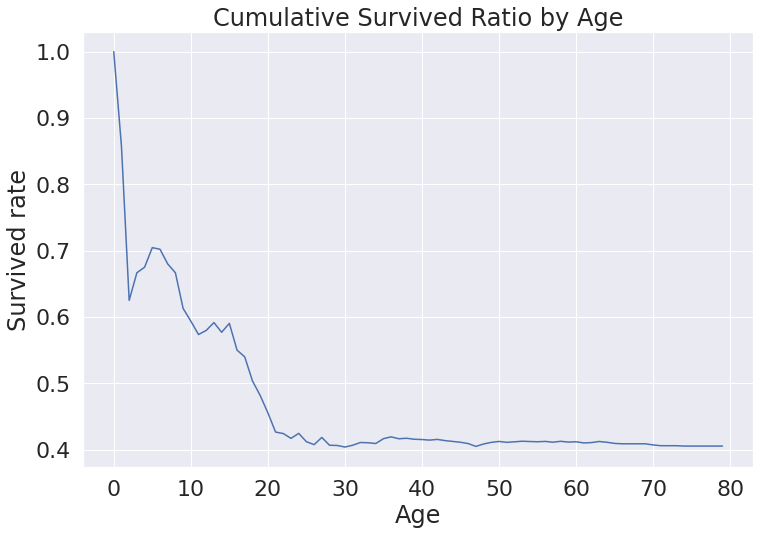

In [20]:
max_age = train['Age'].max()
cum_survived_ratio = []

for i in range(1, int(max_age) + 1):
    cum_survived_ratio.append(train[train['Age'] < i]['Survived'].sum() / train[train['Age'] < i].shape[0])
plt.figure(figsize=(12, 8))
plt.plot(cum_survived_ratio)
plt.title('Cumulative Survived Ratio by Age')
plt.ylabel('Survived rate')
plt.xlabel('Age')
plt.show()

Children first.

Pclass, Sex, and Age

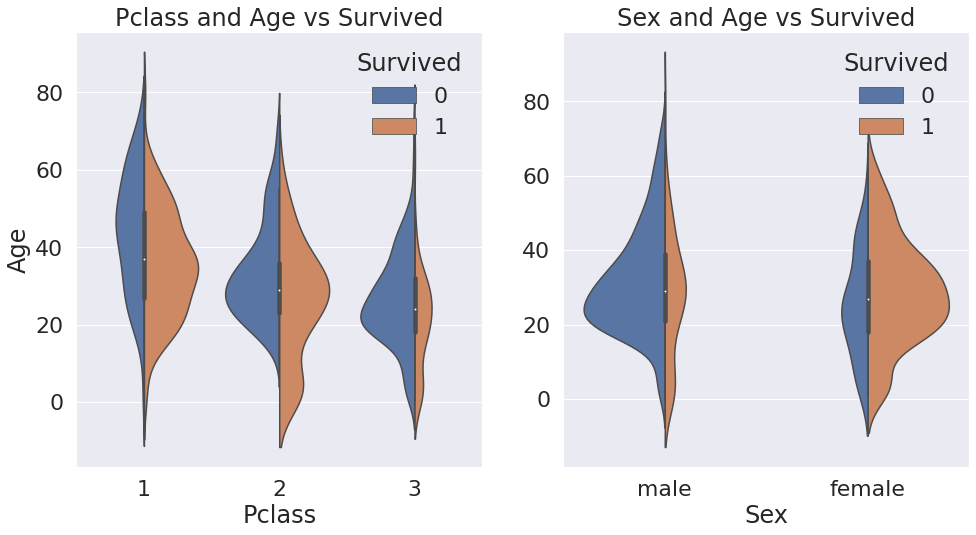

In [21]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_ylabel('')
plt.show()

## 1.4 Embarked

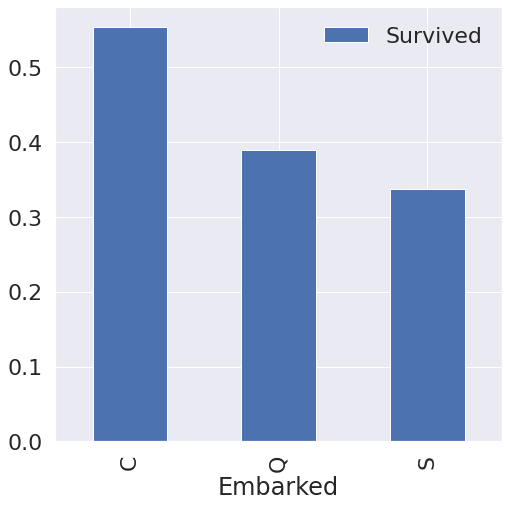

In [22]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().\
sort_values(by='Survived', ascending=False).plot.bar(figsize=(8, 8))
plt.show()

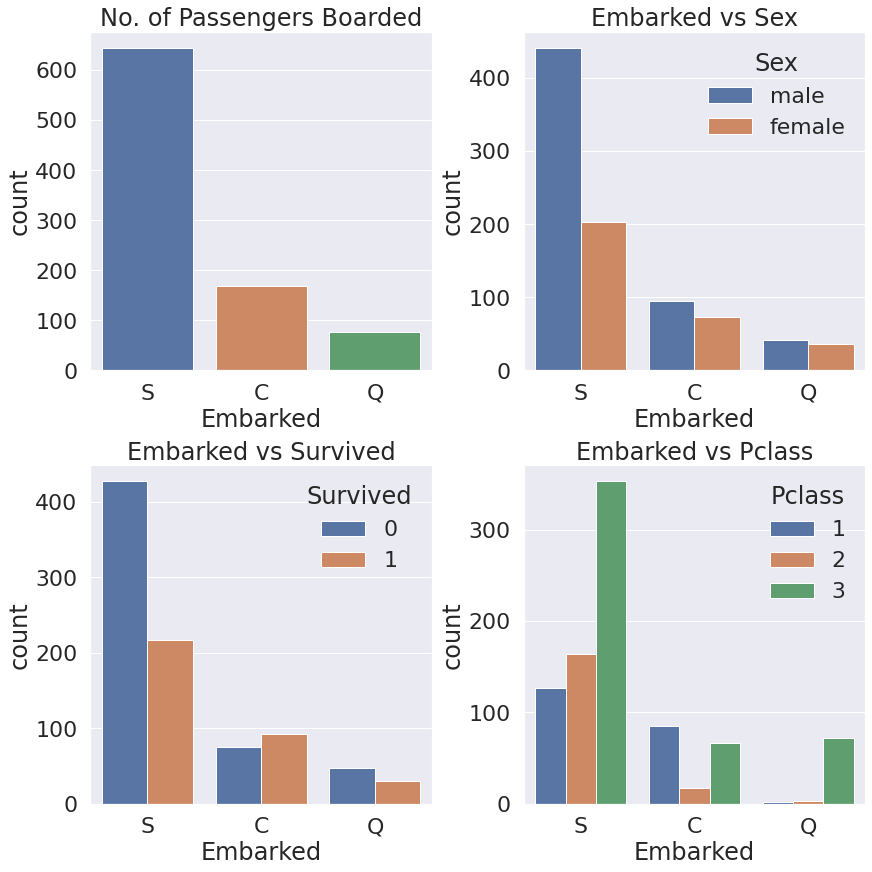

In [23]:
f, ax = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0, 0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Embarked vs Sex')
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.show()

## 1.5 Family
Family = SibSp + Parch + 1

In [24]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

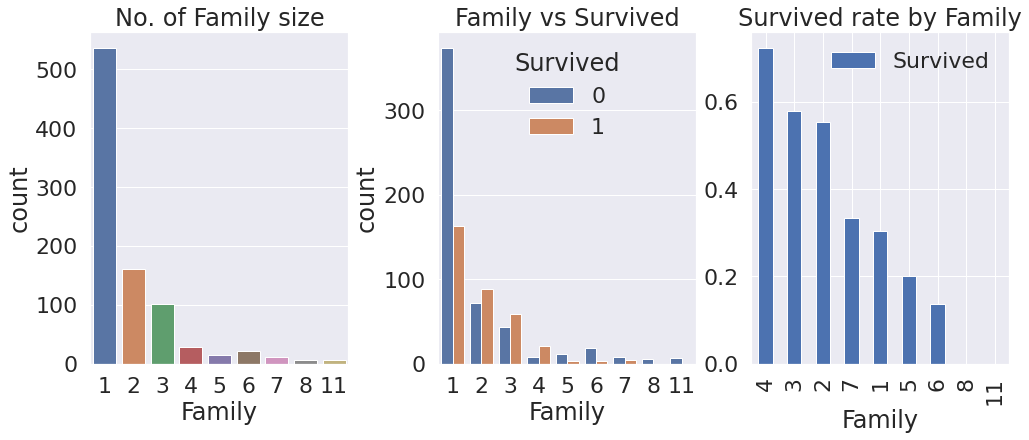

In [25]:
f, ax = plt.subplots(1, 3, figsize=(14, 6), constrained_layout=True)
sns.countplot('Family', data=train, ax=ax[0])
ax[0].set_title('No. of Family size')
sns.countplot('Family', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Family vs Survived')
train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().\
sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survived rate by Family')
plt.show()

## 1.6 Fare

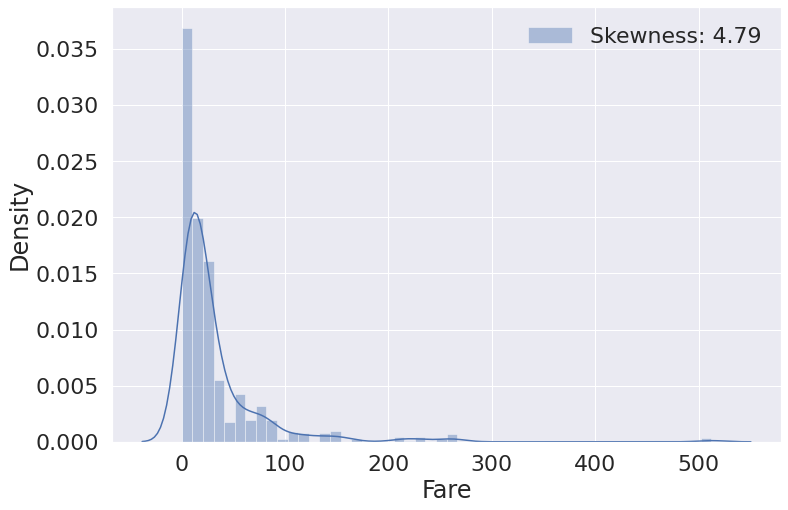

In [26]:
plt.figure(figsize=(12, 8))
sns.distplot(train['Fare'], label='Skewness: {:.2f}'.format(train['Fare'].skew()))
plt.legend(loc='best')
plt.show()

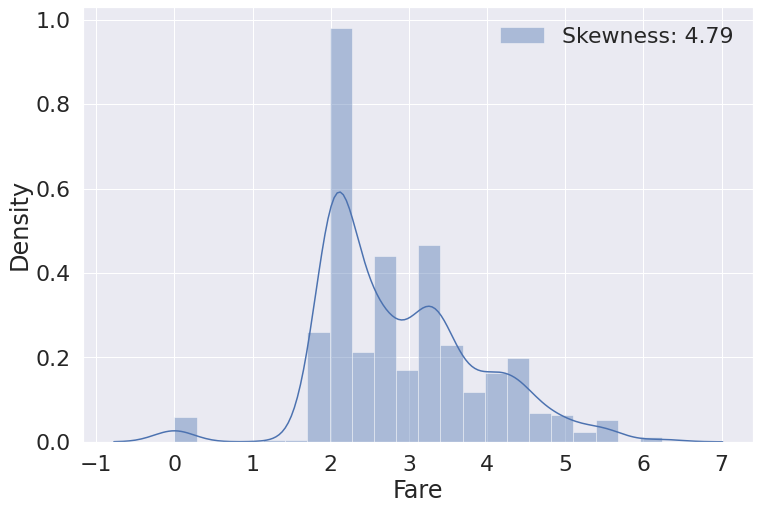

In [27]:
plt.figure(figsize=(12, 8))
sns.distplot(train['Fare'].map(lambda x: np.log(x) if x > 0 else 0),
             label='Skewness: {:.2f}'.format(train['Fare'].skew()))
plt.legend(loc='best')
plt.show()

# 2. Feature Engineering

## 2.1 Fill Null

Age

In [28]:
data_all = pd.concat([train, test]).reset_index(drop=True)

In [29]:
print(data_all['Age'].isnull().sum())

263


In [30]:
train['Title'] = train['Name'].str.extract('([A-Za-z]*)\.')
test['Title'] = test['Name'].str.extract('([A-Za-z]*)\.')

In [31]:
pd.crosstab(train['Title'], train['Sex']).T.style.background_gradient(cmap='autumn_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [32]:
def title_change(x):
    return x if x in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other'

In [33]:
train['Title'] = train['Title'].apply(title_change)
test['Title'] = test['Title'].apply(title_change)

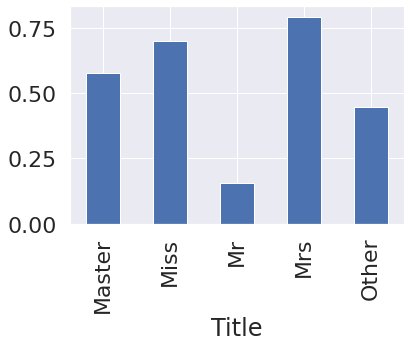

In [34]:
train.groupby('Title')['Survived'].mean().plot.bar()
plt.show()

In [35]:
train.groupby(['Title']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Title,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873,2.263736
Mr,454.499033,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560,1.441006
Mrs,453.160000,0.792000,2.000000,35.898148,0.696000,0.832000,45.138533,2.528000
Other,546.259259,0.444444,1.333333,42.384615,0.296296,0.074074,39.111422,1.370370


In [36]:
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Master'), 'Age'] = 5
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Miss'), 'Age'] = 22
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Mr'), 'Age'] = 32
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Mrs'), 'Age'] = 36
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Other'), 'Age'] = 42

In [37]:
test.loc[(test['Age'].isnull()) & (test['Title'] == 'Master'), 'Age'] = 5
test.loc[(test['Age'].isnull()) & (test['Title'] == 'Miss'), 'Age'] = 22
test.loc[(test['Age'].isnull()) & (test['Title'] == 'Mr'), 'Age'] = 32
test.loc[(test['Age'].isnull()) & (test['Title'] == 'Mrs'), 'Age'] = 36
test.loc[(test['Age'].isnull()) & (test['Title'] == 'Other'), 'Age'] = 42

Embarked

In [38]:
train['Embarked'].isnull().sum()

2

In [39]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

Fare

In [40]:
test['Fare'].isnull().sum()

1

In [41]:
test['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [42]:
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

## 2.2 Chage string to numeric

In [43]:
print(train['Sex'].unique())
print(train['Embarked'].unique())
print(train['Title'].unique())

['male' 'female']
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [44]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
train['Title'] = train['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Title'] = test['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4})

In [45]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family', 'Title', 'Age']]

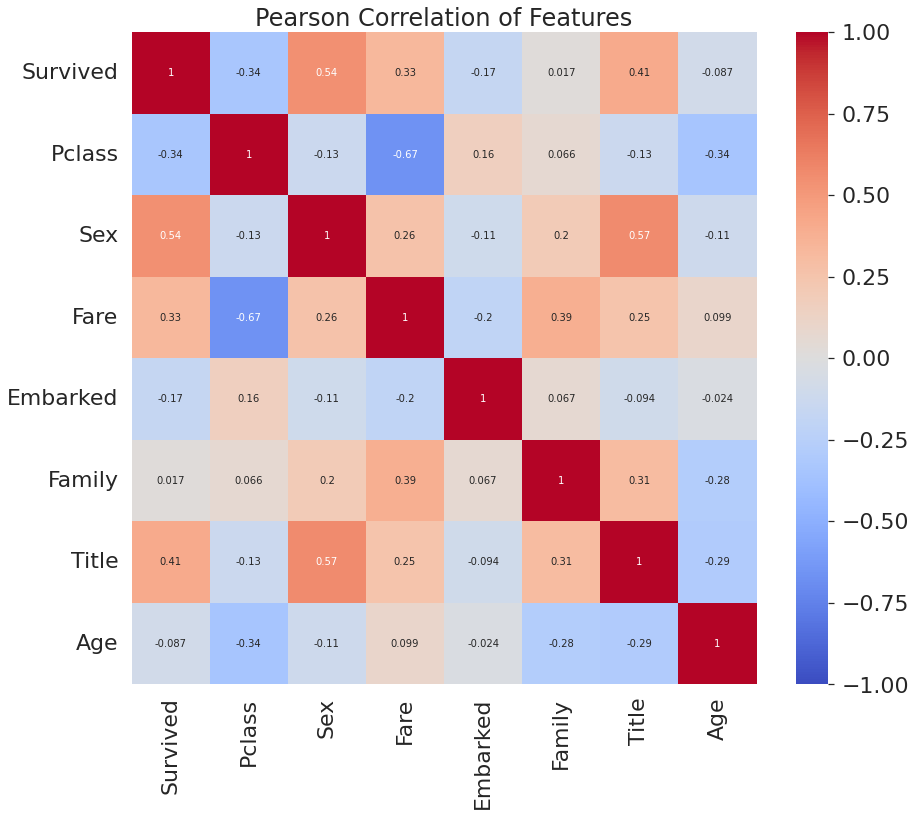

In [46]:
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True)
plt.title('Pearson Correlation of Features')
plt.show()

## 2.3 One Hot Encoding

In [47]:
train = pd.get_dummies(train, columns=['Title'])
test = pd.get_dummies(test, columns=['Title'])

In [48]:
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family,Title_0,Title_1,Title_2,Title_3,Title_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,2,1,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,2,0,1,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,1,0,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,2,0,1,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,1,1,0,0,0,0,0,0,1


In [50]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [51]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Family,Title_0,Title_1,Title_2,Title_3,Title_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,0,22.0,1.981001,2,1,0,0,0,0,0,0,1
1,1,1,1,38.0,4.266662,2,0,1,0,0,0,1,0,0
2,1,3,1,26.0,2.070022,1,0,0,1,0,0,0,0,1
3,1,1,1,35.0,3.972177,2,0,1,0,0,0,0,0,1
4,0,3,0,35.0,2.085672,1,1,0,0,0,0,0,0,1


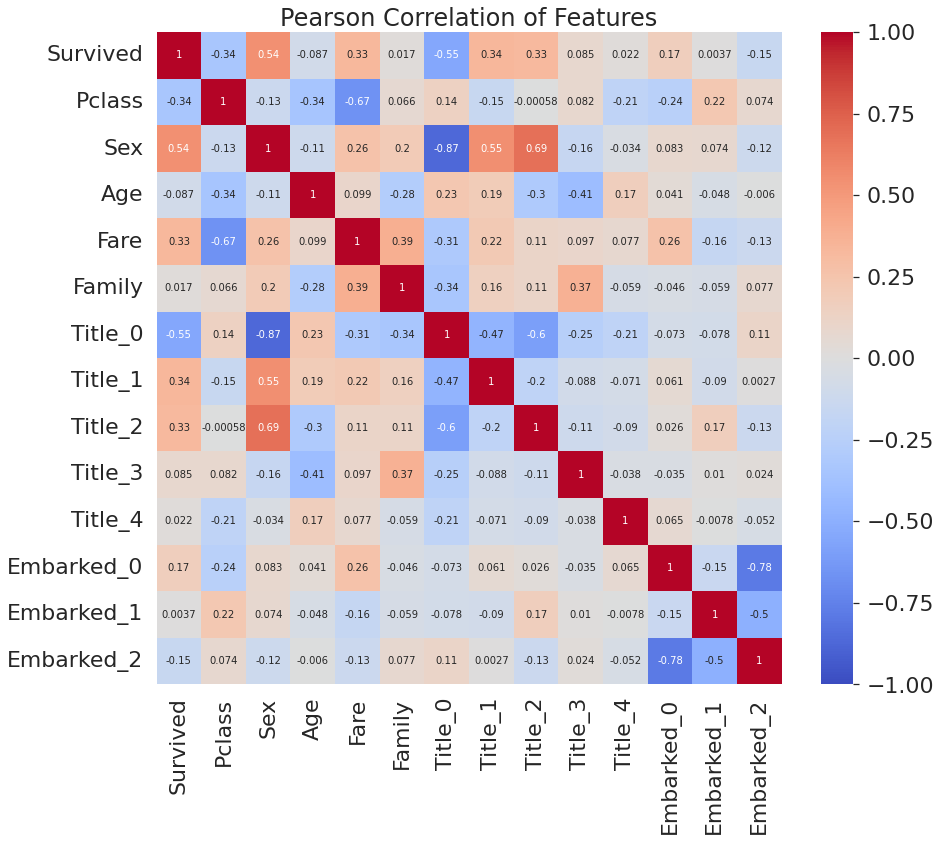

In [52]:
plt.figure(figsize=(14, 12))
sns.heatmap(train.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True)
plt.title('Pearson Correlation of Features')
plt.show()

# 3 Modeling

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [54]:
X_train = train.drop('Survived', axis=1).to_numpy()
y_train = train['Survived'].to_numpy()
X_test = test.to_numpy()

In [55]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [56]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [57]:
prediction = model.predict(X_val)

In [58]:
metrics.accuracy_score(prediction, y_val)

0.835820895522388

In [59]:
feature_importance = pd.Series(model.feature_importances_, index=test.columns)

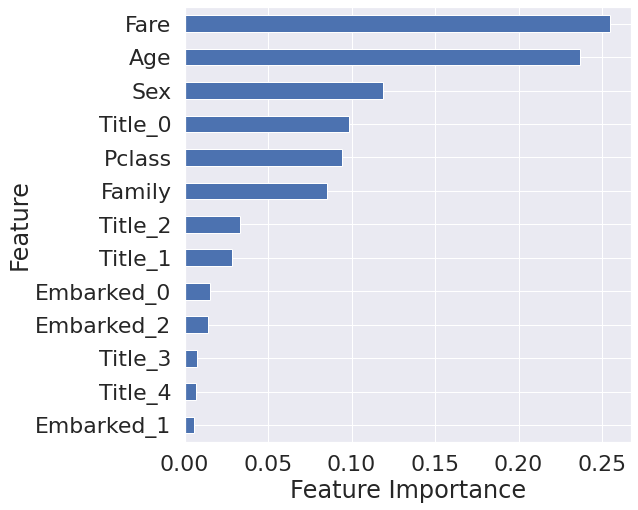

In [60]:
plt.figure(figsize=(8, 8))
feature_importance.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [61]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [62]:
submission['Survived'] = model.predict(X_test)

In [63]:
submission.to_csv('./titanic_first_try.csv', index=False)